<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Image_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and process image

In [2]:
#import necessary libraries
from PIL import Image
import requests
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#load image from an URL
url = "https://cdn.pixabay.com/photo/2017/06/22/12/19/tiger-2430625_1280.jpg"

image = Image.open(requests.get(url, stream = True).raw)

print(image)

#resize image
width = 128
height = 128

image = image.resize ((width, height), Image.ANTIALIAS)

#normalize
image = numpy.asarray(image) / 255

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x853 at 0x7F9616724D00>


Build training dataset

In [4]:
#Get color channels
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

#create training output
train_y = numpy.array([red.ravel(), green.ravel(), blue.ravel()]).T

#create training features
width, height, colors = image.shape

t, s = numpy.mgrid[0:width, 0:height] #get dense mesh grid


s = (s - s.mean()) / s.std() #get s standard deviation

t = (t - t.mean()) / t.std() #get t standard deviation

train_x = numpy.array([s.ravel(), t.ravel()], dtype=numpy.float32).T

visualize training dataset

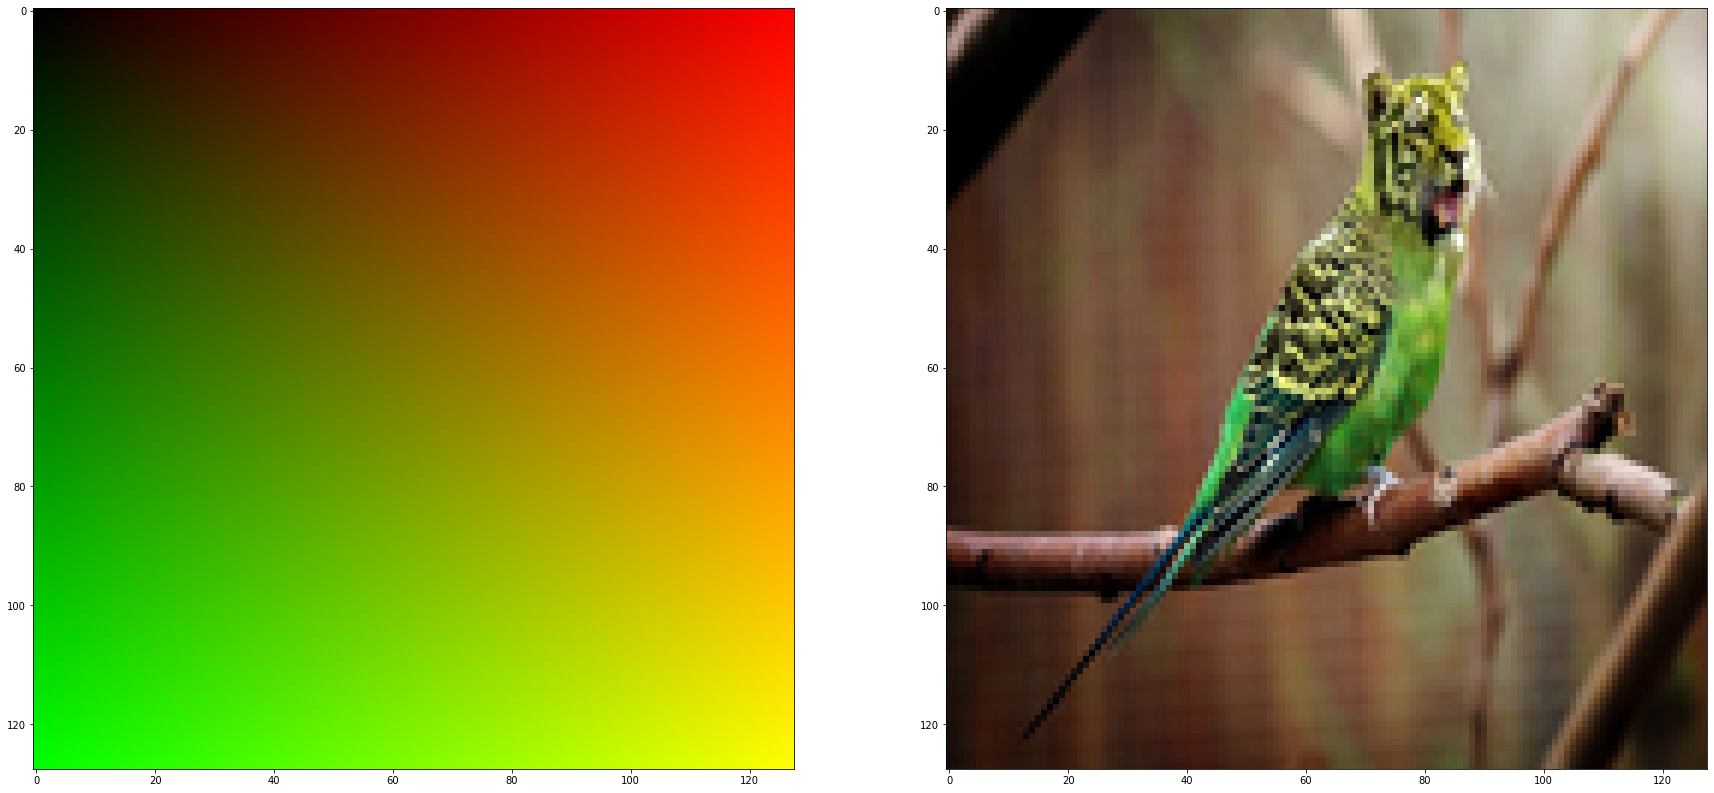

In [5]:
#visualize training dataset
figure, [col1, col2] = plt.subplots(1, 2, figsize = (30, 20))

stack = numpy.stack([s, t, s*0], axis = 2)

stack = (stack - stack.min()) / (stack.max() - stack.min())

stack[:, :, 2] = 0

col1.imshow(stack)
col2.imshow(image)
plt.show()

Build testing dataset

In [6]:
new_width = 300

new_height = 300

t, s = numpy.mgrid[0: new_width, 0: new_height]

s = (s - s.mean()) / s.std() #get s standard deviation

t = (t - t.mean()) / t.std() #get t standard deviation

test_x = numpy.array([s.ravel(), t.ravel()], dtype=numpy.float32).T

Build neural network

In [7]:
number_of_neurons = [2**i for i in range(5, 11)]

neural_network = tf.keras.Sequential([
                tf.keras.layers.Input(2),
                *[tf.keras.layers.Dense(n, activation="relu") for n in number_of_neurons],
                tf.keras.layers.Dense(3, activation="sigmoid")
])

neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dense_6 (Dense)             (None, 3)                 3

Train neural network

In [8]:
#compile model
neural_network.compile(
    loss = "mean_squared_error",
    optimizer = "adam",
    metrics=["accuracy"]
)

#train model
neural_network.fit(train_x, train_y, epochs = 100)

Epoch 1/100
512/512 [==============================] - 4s 3ms/step - loss: 0.0146 - accuracy: 0.9285
Epoch 2/100
512/512 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.9479
Epoch 3/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9489
Epoch 4/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9507
Epoch 5/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0092 - accuracy: 0.9533
Epoch 6/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0086 - accuracy: 0.9532
Epoch 7/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9536
Epoch 8/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.9539
Epoch 9/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.9539
Epoch 10/100
512/512 [==============================] - 1s 3ms/step - loss: 0.0074 - accura

Visualize results

512/512 [==============================] - 1s 2ms/step


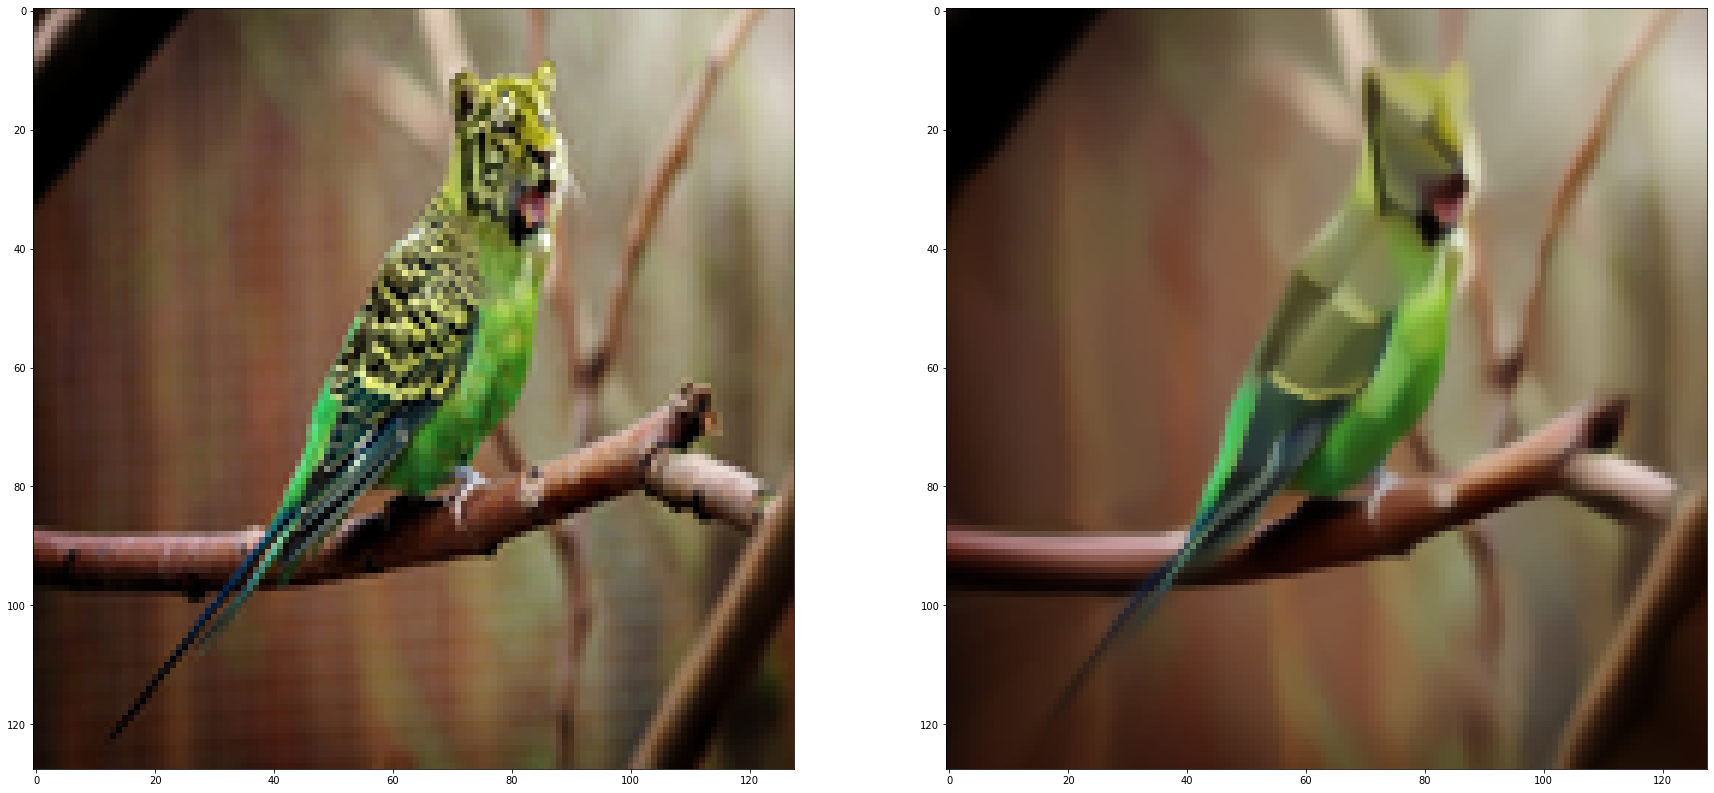

In [10]:
figure, [col1, col2] = plt.subplots(1, 2, figsize = (30, 30))

col1.imshow(image)

prediction = neural_network.predict(train_x)

prediction = prediction.reshape(width, height, colors)

col2.imshow(prediction)

2813/2813 [==============================] - 4s 2ms/step


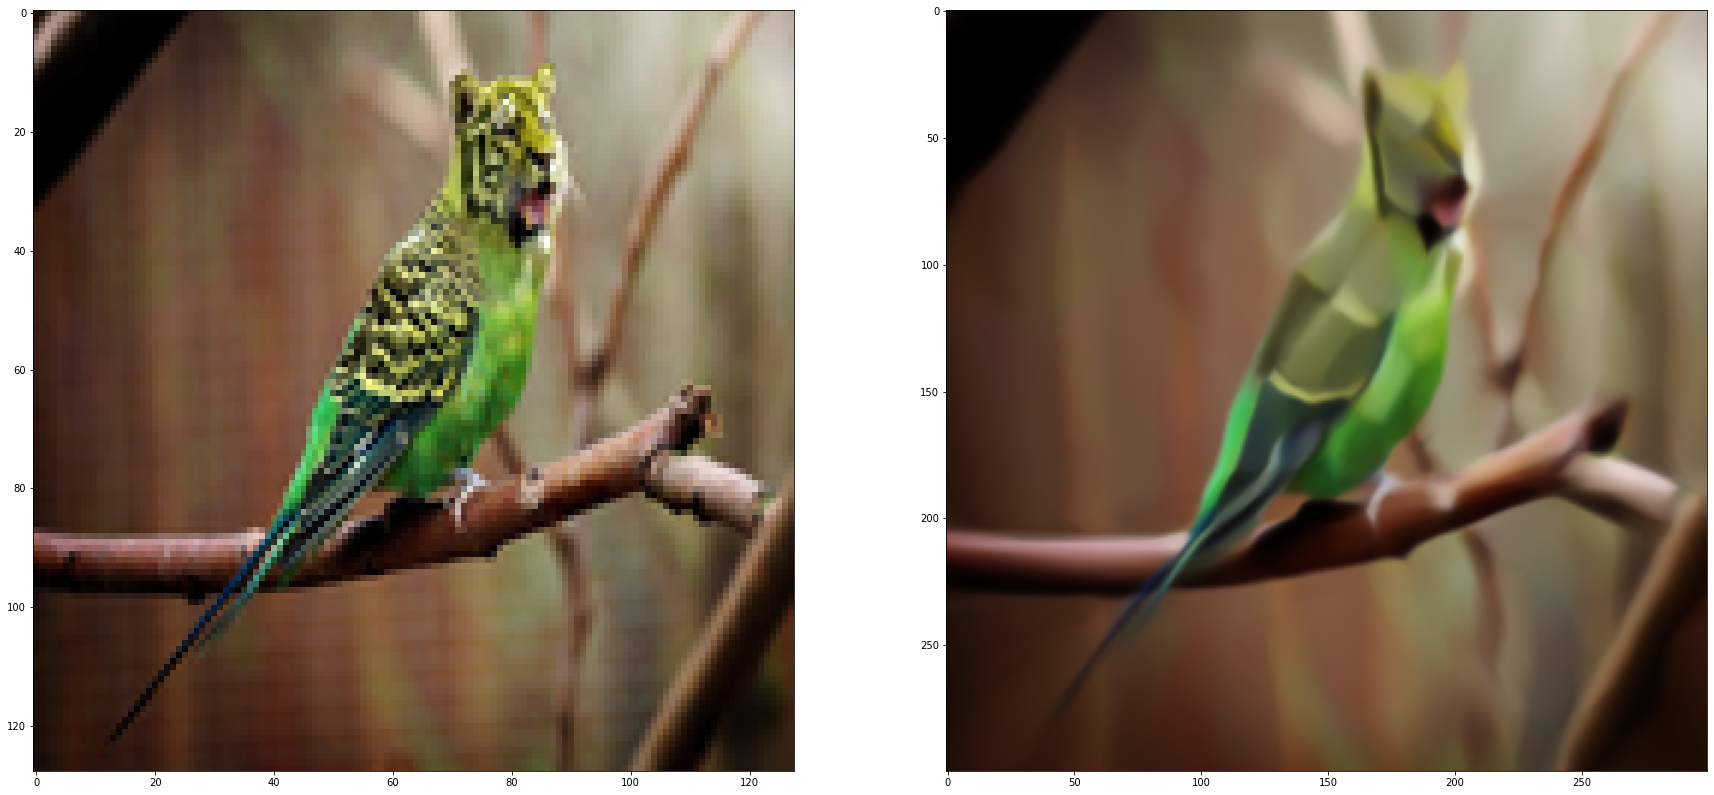

In [11]:
figure, [col1, col2] = plt.subplots(1, 2, figsize = (30, 30))

col1.imshow(image)

prediction = neural_network.predict(test_x)

prediction = prediction.reshape(new_width, new_height, colors)

col2.imshow(prediction)